In [1]:
%pip install numpy scikit-learn matplotlib sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [2]:
# Declaramos librerías
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree

In [3]:
# Creamos un conjunto de datos de clasificación
personajes = [{'Nombre': 'Bellatrix',    'Casa': 0, 'Valentía': 7, 'Maldad': 10},
              {'Nombre': 'Colagusano',   'Casa': 1, 'Valentía': 2, 'Maldad': 7},
              {'Nombre': 'Draco Malfoy', 'Casa': 0, 'Valentía': 4, 'Maldad': 7},
              {'Nombre': 'Dumbledure',   'Casa': 1, 'Valentía': 9, 'Maldad': 9},
              {'Nombre': 'Ginny',        'Casa': 1, 'Valentía': 8, 'Maldad': 2},
              {'Nombre': 'Harry Potter', 'Casa': 1, 'Valentía': 8, 'Maldad': 6},
              {'Nombre': 'Hermione',     'Casa': 1, 'Valentía': 10, 'Maldad': 4},
              {'Nombre': 'Lupin',        'Casa': 1, 'Valentía': 7, 'Maldad': 3},
              {'Nombre': 'McGonagall',   'Casa': 1, 'Valentía': 9, 'Maldad': 2},
              {'Nombre': 'Neville',      'Casa': 1, 'Valentía': 5, 'Maldad': 1},
              {'Nombre': 'Ron',          'Casa': 1, 'Valentía': 6, 'Maldad': 2},
              {'Nombre': 'Sirius',       'Casa': 1, 'Valentía': 9, 'Maldad': 1},
              {'Nombre': 'Snape',        'Casa': 0, 'Valentía': 10, 'Maldad': 5},
              {'Nombre': 'Umbridge',     'Casa': 0, 'Valentía': 5, 'Maldad': 10},
              {'Nombre': 'Voldemort',    'Casa': 0, 'Valentía': 10, 'Maldad': 10},
              
              {'Nombre': 'Luna Lovegood',      'Casa': 2, 'Valentía': 7, 'Maldad': 1},
              {'Nombre': 'Gilderoy Lockhart',  'Casa': 2, 'Valentía': 1, 'Maldad': 5},
              {'Nombre': 'Helena Ravenclaw',   'Casa': 2, 'Valentía': 7, 'Maldad': 2},
              {'Nombre': 'Garrick Ollivander', 'Casa': 2, 'Valentía': 3, 'Maldad': 1},
              {'Nombre': 'Cho Chang',          'Casa': 2, 'Valentía': 5, 'Maldad': 2},
              {'Nombre': 'Flitwick',           'Casa': 2, 'Valentía': 6, 'Maldad': 4},
             ]

X = []
y = []
for personaje in personajes:
    X.append([personaje['Valentía'], personaje['Maldad']])
    y.append(personaje['Casa'])

print(X)
print(y)

[[7, 10], [2, 7], [4, 7], [9, 9], [8, 2], [8, 6], [10, 4], [7, 3], [9, 2], [5, 1], [6, 2], [9, 1], [10, 5], [5, 10], [10, 10], [7, 1], [1, 5], [7, 2], [3, 1], [5, 2], [6, 4]]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2]


In [4]:
# Dividimos el conjunto de datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# Creamos el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=10)
# max_leaf_nodes=3 (Cantidad máxima de hojas en cada nodo) 
# max_depth_3 (Profundidad máxma del árbol)

# Entrenamos el modelo
clf.fit(X, y)

DecisionTreeClassifier(random_state=10)

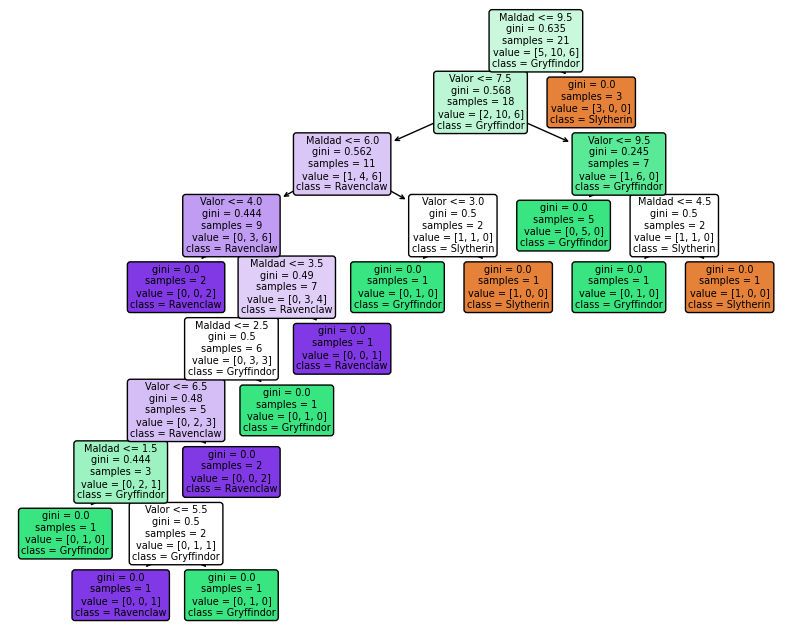

In [6]:
# Visualizamos el árbol de decisión
plt.figure(figsize=(10,8))
tree.plot_tree(clf, filled=True, rounded=True, class_names=["Slytherin", "Gryffindor", "Ravenclaw"], feature_names=["Valor", "Maldad"])
plt.show()


In [7]:
# Función para trazar las regiones de decisión
import matplotlib.patches as mpatches

def plot_decision_regions(X, y, classifier, resolution=0.01):
    
    # plot the decision surface
    x1_min = 0
    x1_max = 11
    x2_min = 0
    x2_max = 11
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    custom_cmap = ListedColormap(['#008000', '#FFA500', "#0000FF"])  # Verde y Naranja
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=custom_cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    Sl_x, Sl_y, Gr_x, Gr_y = [], [], [], []

        # Plotea los datos, las etiquetas de las casas y agrega un título a cada punto
    for personaje in personajes:

        if personaje["Casa"] == 0:
            color = "green"
        elif personaje["Casa"] == 1:
            color = "orange"
        else:
            color = "blue"

        plt.scatter(personaje['Valentía'], personaje['Maldad'], color=color)
        plt.text(personaje['Valentía'] + 0.1, personaje['Maldad'] + 0.1, personaje['Nombre'], fontsize=9)

    sl_patch = mpatches.Patch(color='green', label='Slytherin')
    gr_patch = mpatches.Patch(color='orange', label='Gryffindor')
    rv_patch = mpatches.Patch(color='blue', label='Ravenclaw')
    plt.legend(handles=[sl_patch, gr_patch, rv_patch])


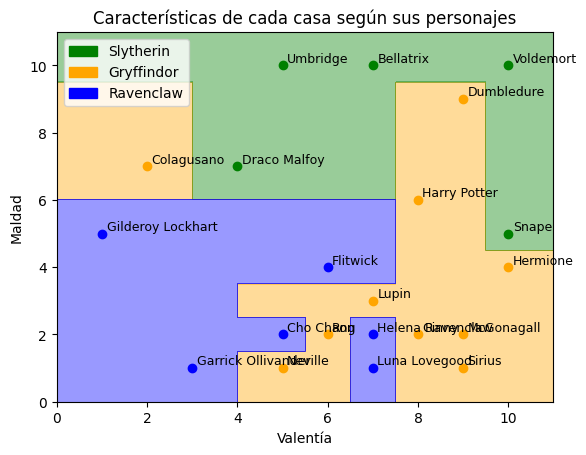

In [8]:
# Visualización de las regiones de clasificación
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('Valentía')
plt.ylabel('Maldad')
# Agregar título
plt.title("Características de cada casa según sus personajes")
plt.show()

In [9]:
# Inferencia del modelo:

nom = input("Ingresa el nombre de quien quieras predecir su casa")
valentia = int(input("Ingresa su puntuación de valentía"))
maldad = int(input("Ingresa su puntuación de maldad"))

X_new = [[valentia, maldad]]

# Realizar predicciones
y_pred = clf.predict(X_new)

if y_pred[0] == 0:
    text_prediction ="Gryffindor"
elif y_pred[0] == 1:
    text_prediction ="Slytherin"
else:
    text_prediction ="Ravenclaw"

print(f"La predicción para {nom} es:", text_prediction)

La predicción para pedro es: Ravenclaw
